# Assignment No-5


## Question No-1

#### Problem Statement - Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [4]:
# importing & installing packages & libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [5]:
# Read the data

startup = pd.read_csv("50_Startups.csv")

In [6]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##### The given data set contains 5 variables namely R&D spend, Administration, Marketing Spend, State & Profit 

##### The above variables stands for 

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [7]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


##### The above results provides the average, minimum, maximum and other quartile values of the given variables except state as it is not a integer 

In [8]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### the above result shows that there are no NA's in the given data set or there is no missing values in the given data set

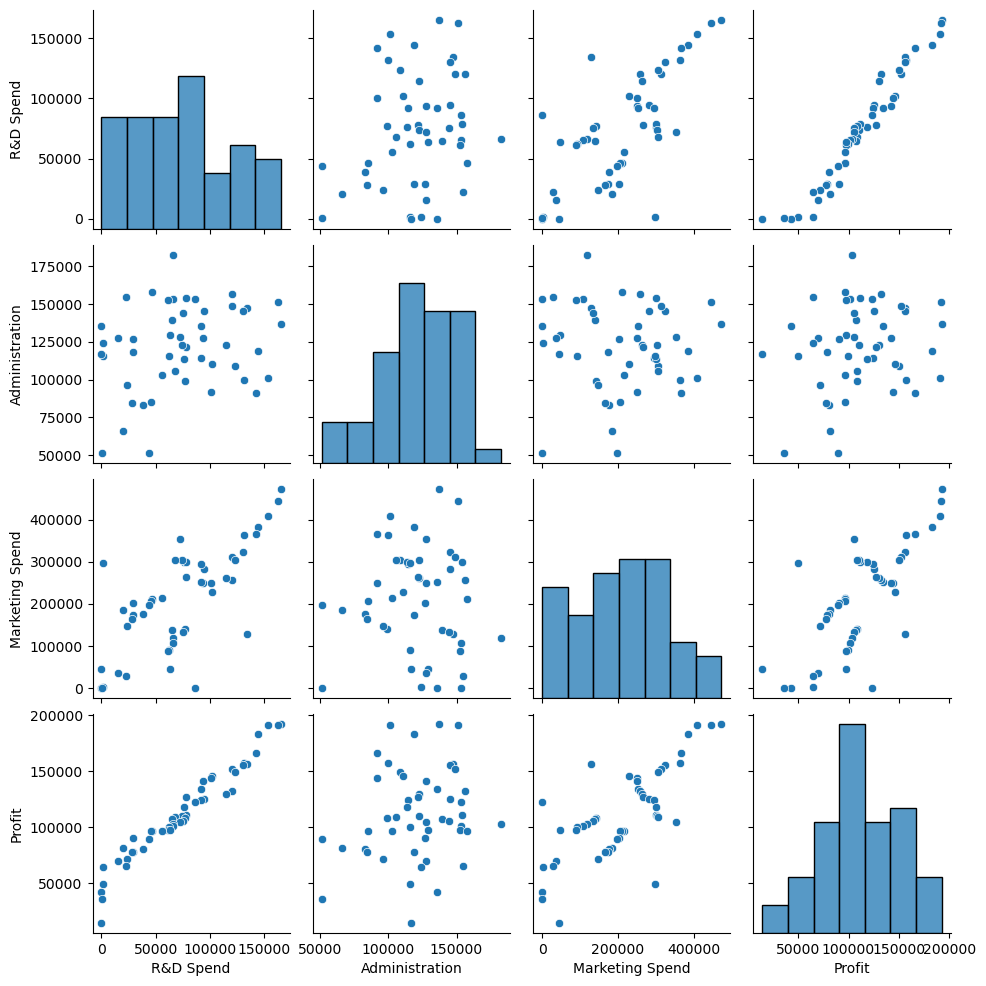

In [10]:
# Drawing a pairplot to understand the relations between variables 

sns.pairplot(startup)

## Correlation 

In [11]:
corrmatrix = startup.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4856\1770703372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = startup.corr()


<Axes: >

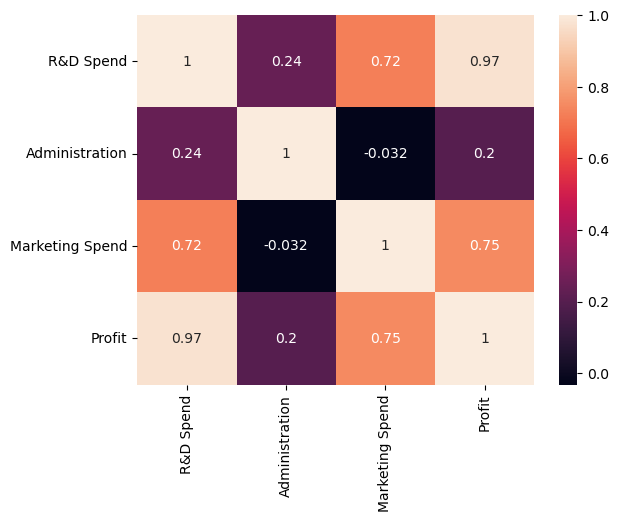

In [12]:
sns.heatmap(corrmatrix, annot=True)

#### The above result of the model shows the R square as 95% which is considered as one of the good model. But if we observe the p values of all the variables they are not in acceptable terms. This in turn reflects multi-collinearity issue in the model.¶

## Undertaking Regression Model 

In [13]:
# getting dummies for the state as they are in categorical term and only 3 states are there 

df1 = pd.get_dummies(startup, columns=['State'])

In [14]:
X = df1[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']] # all the independent variables 
Y = df1[['Profit']] # the dependent variable 


In [15]:
# fitting the model 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.34e-27
Time:                        17:03:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the above result shows R square as 95% which is considered as good model but the p value of Administration is not in the acceptable limit. This also shows that there might be collinearity issue within the independent variables as well as some outliers in the model. Therefore lets chech for these tow issues in the given data set. 

## Solving the Multi-Collinearity issue in the model 

## Variance Inflation Factor

##### A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model. Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [17]:
vif = pd.DataFrame()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [20]:
vif["features"] = X.columns

In [21]:
vif.round(1)

,VIF Factor,features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


#### the above results of VIF shows that Administration needs to be removed and also it has highest p value

## Cook's Distance 

#### Cook’s distance is the scaled change in fitted values, which is useful for identifying outliers in the X values (observations for predictor variables). Cook’s distance shows the influence of each observation on the fitted response values.

In [22]:
infl = model.get_influence()

In [23]:
summ_df = infl.summary_frame()

In [24]:
summ_df.sort_values('cooks_d', ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


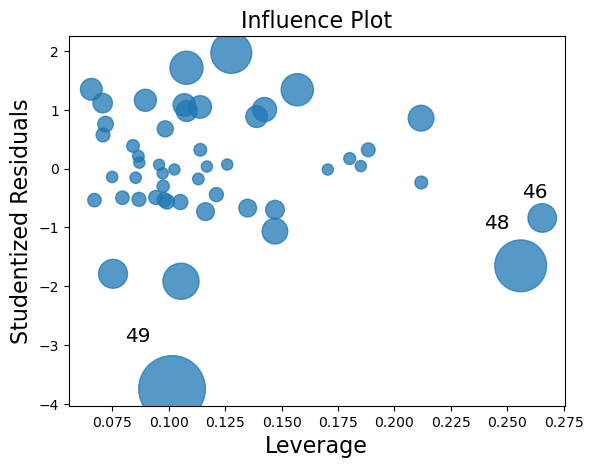

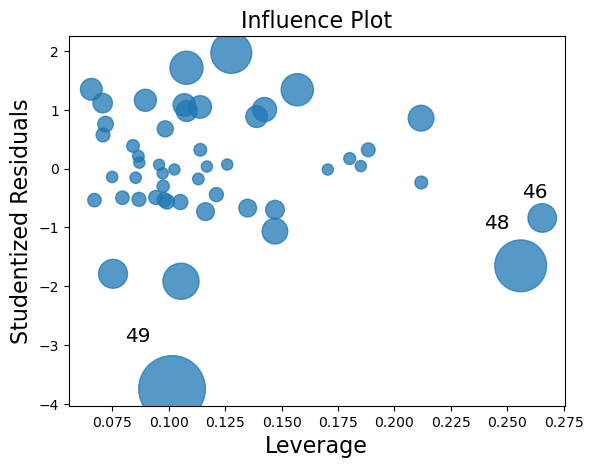

In [25]:
infl.plot_influence()

#### The above plot clearly reflects that index number 48 & 49 has the highest cook's distance. Which reflects that these are the outliers which is affecting our model. Hence, it will be wise to drop these rows for building a better model. 

In [26]:
#removing the index 48 & 49 from the data set as these row had highest cook's distance having highest influence

new_df = df1.drop(df1.index[[49,48]])

In [27]:
new_df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [28]:
#building new model without Administration variable (reason found from VIF) 
#and without index 48 & 49 (reason found from cook's distance) 

new_X = new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
new_Y = new_df[['Profit']]

In [29]:
model2 = sm.OLS(new_Y, new_X).fit()
predictions = model2.predict(new_X)

In [30]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.02e-29
Time:                        17:03:50   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the above result shows that all the variables are now significant as well as the R square value is 96% compared to the earlier model of 95%. But we will also explore some other models to find the best model for the problem. 

## Residual Analysis (Q-Q Plot)

Q-Q (quantile-quantile) plots play a vital role in graphically analyzing and comparing two probability distributions by plotting their quantiles against each other. If the two distributions that we are comparing are exactly equal, then the points on the Q-Q plot will perfectly lie on a straight line y = x. A Q-Q plot tells us whether a data set is normally distributed

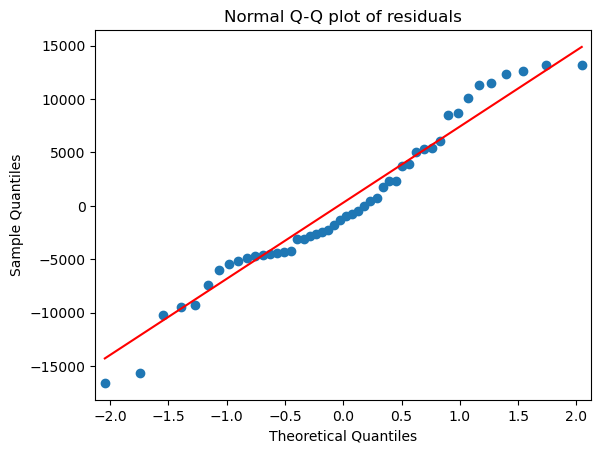

In [31]:
import statsmodels.api as sm

qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Component Residual Plot

Component residual plots, an extension of partial residual plots, are a good way to see if the predictors have a linear relationship to the dependent variable. A partial residual plot essentially attempts to model the residuals of one predictor against the dependent variable. A component residual plot adds a line indicating where the line of best fit lies. A significant difference between the residual line and the component line indicates that the predictor does not have a linear relationship with the dependent variable. 

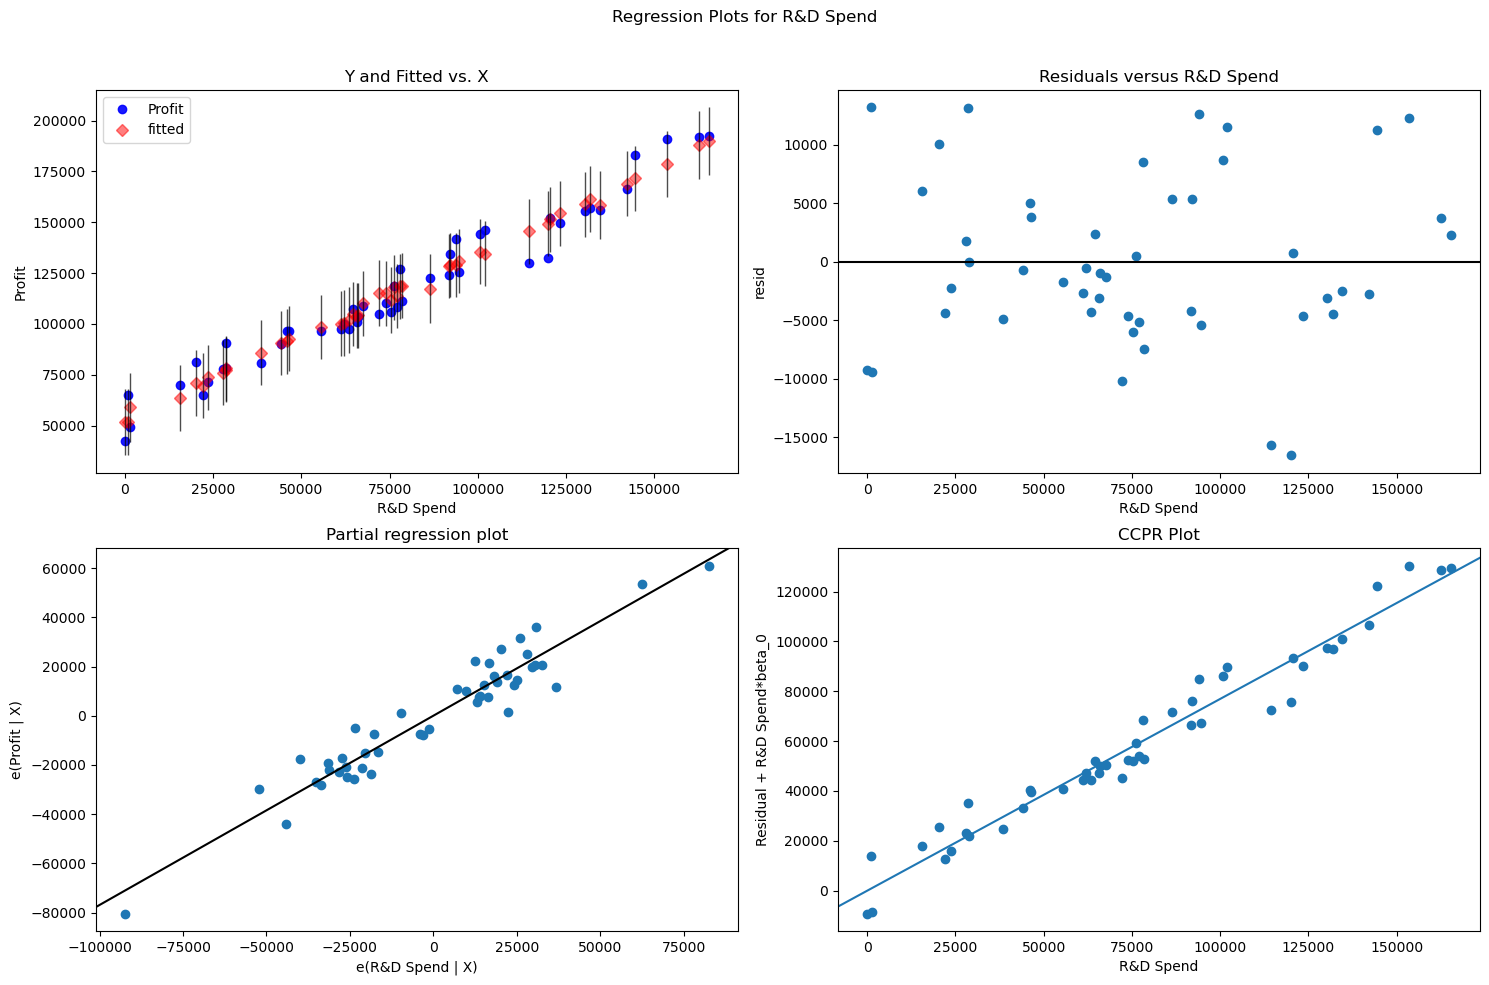

In [32]:
## component residual plot for R&D to see whether it is normally distributed in the model2
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model2, "R&D Spend", fig=fig)
plt.show()

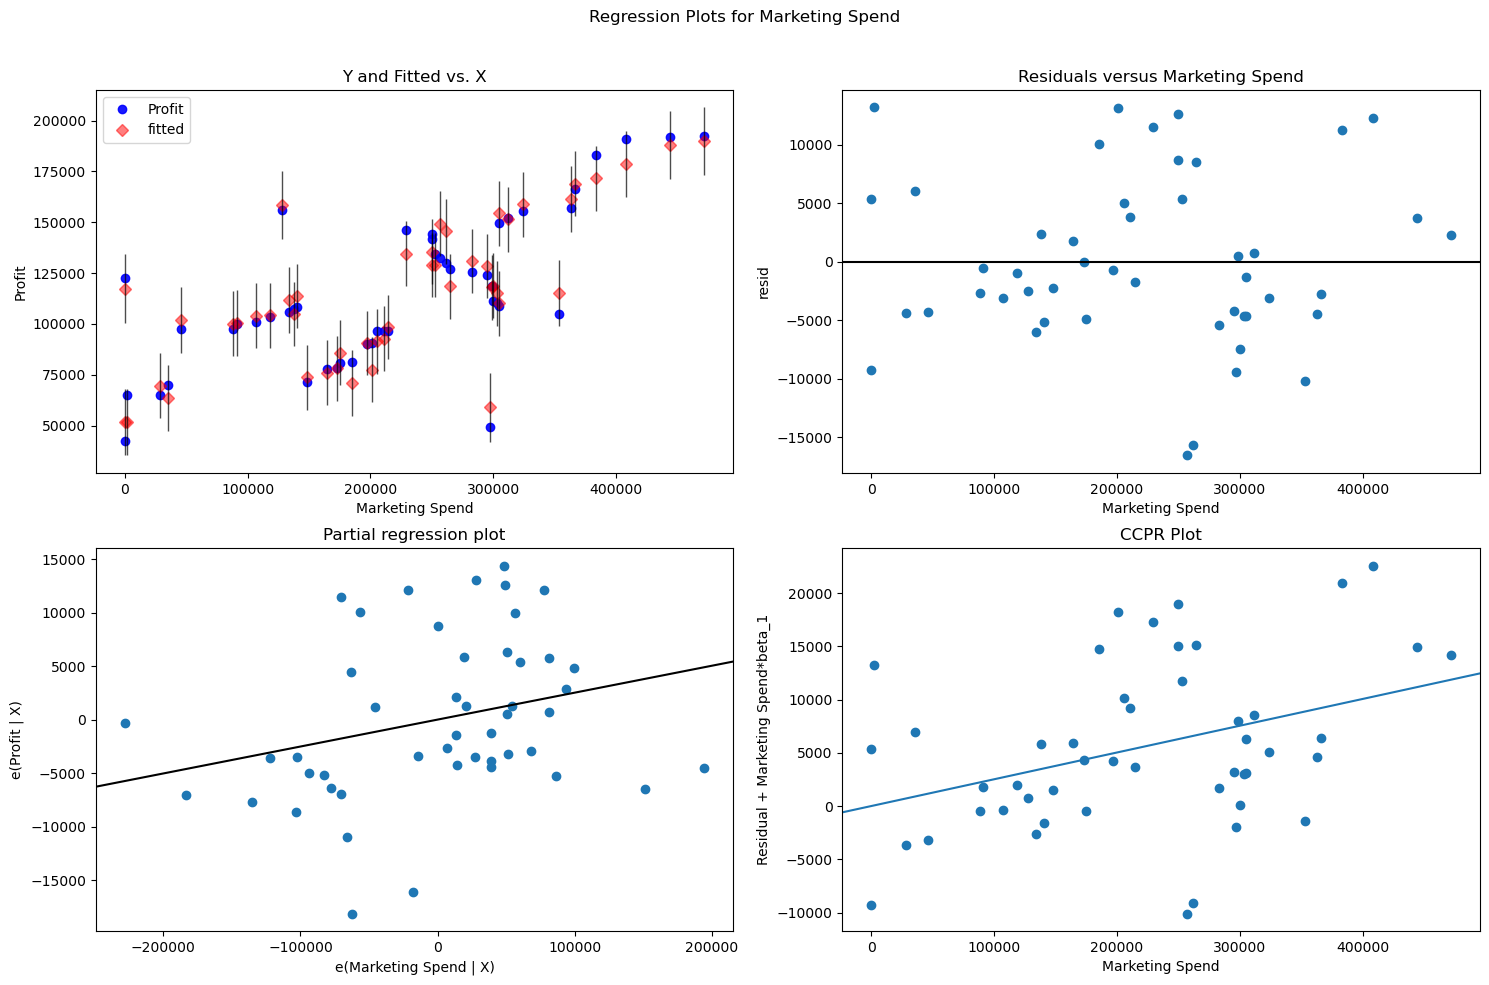

In [33]:
## component residual plot for Marketing Spend to see whether it is normally distributed in the model2
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model2, "Marketing Spend", fig=fig)
plt.show()

#### The above plots clearly reflects that the 2 independent variables i.e., the R&D spend and Marketing spend are normally distributed. Hence it has a linear relationship with profit of the startups. 

#### Though model 2 has good R square lets find out the AIC & BIC value of the same

## AIC 

The Akaike information criterion (AIC) is a measure of the relative quality of a statistical model for a given set of data, and it provides a trade-off between the goodness-of-fit of the model and its complexity. It's based on information theory and measures the amount of information lost by a model when it is used to approximate the true underlying distribution of the data.

## BIC 

The Bayesian information criterion (BIC) is a statistical measure used for model selection among a finite set of models. The BIC is a goodness-of-fit test that balances the complexity of a model with its goodness-of-fit to the data.

## The lower the AIC & BIC the better the model is

In [34]:
model2 = sm.OLS(new_Y, new_X).fit()

(model2.rsquared,model2.aic,model2.bic) 

(0.9611488413298318, 998.5947022159359, 1007.9507072704753)

### Lets try for another model with Square root transformation of the variables

In [35]:
X_sqrt = np.sqrt(new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']])
Y_sqrt = np.sqrt(new_df['Profit'])

model3 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions3 = model3.predict(X_sqrt)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     141.7
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.64e-24
Time:                        17:03:52   Log-Likelihood:                -196.16
No. Observations:                  48   AIC:                             402.3
Df Residuals:                      43   BIC:                             411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5271      0.030     17.371      0.000       0.466       0.588
Marketing Spend      0.0231      0.018      1.270      0.211      -0.014       0.060
State_California   187.8689      7.377     25.465      0.000     172.991     202.747
State_Florida      187.0162      8.256     22.652      0.000     170.366     203.666
State_New York     189.8076      7.759     24.463      0.000     174.160     205.455
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.007
Skew:                           0.870   Prob(JB):                       0.0301
Kurtosis:                       3.692   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
(model3.rsquared,model3.aic,model3.bic) ## finding AIC, R Square & BIC of the model3 where we have transformed the variables with square root


(0.9294774791599976, 402.32460235084176, 411.68060740538124)

### Though model 3 has lower AIC & BIC compared to model 2, the R square value of model 2 is better than model 3. The R square of model 2 is 96% whereas the R-square of model 3 is 92%. Therefore we will select model 2 as the best fit model for the given problem for startup to predict their profits. 

